## Falcons
#### (Mohammed Almatrafi, Yazeed Alghamdi, Yasser Alshehri, Abdulrahim Aljadani)
prediction of the sales for the upcoming 4 months

In [11]:
import pandas as pd
from pandas import DataFrame

In [12]:
df = pd.read_csv('sales.csv')

C:\Users\ma0me\AppData\Local\Temp\ipykernel_8360\1669249776.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales.csv')


In [13]:
df

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
592556,273284,620,6,2015-02-28,852,1,0,0,0,10070
592557,95245,487,6,2015-02-28,780,1,0,0,0,7723
592558,625491,707,6,2015-02-28,632,1,0,0,0,6451
592559,643088,786,6,2015-02-28,196,1,0,0,0,1369


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592561 entries, 0 to 592560
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           592561 non-null  int64 
 1   store_ID             592561 non-null  int64 
 2   day_of_week          592561 non-null  int64 
 3   date                 592561 non-null  object
 4   nb_customers_on_day  592561 non-null  int64 
 5   open                 592561 non-null  int64 
 6   promotion            592561 non-null  int64 
 7   state_holiday        592561 non-null  object
 8   school_holiday       592561 non-null  int64 
 9   sales                592561 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 45.2+ MB


In [15]:
df.state_holiday.unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [16]:
df.school_holiday.unique()

array([1, 0], dtype=int64)

In [17]:
df.describe()

,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000
mean,356039.480762,558.463546,4.002315,634.848002,0.831509,0.379419,0.181418,5744.577431
std,205596.545847,321.957991,1.995855,465.330476,0.374302,0.485243,0.385364,3832.896126
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177871.000000,280.000000,2.000000,404.000000,1.000000,0.000000,0.000000,3703.000000
50%,356159.000000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5702.000000
75%,534138.000000,837.000000,6.000000,839.000000,1.000000,1.000000,0.000000,7808.000000
max,712044.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,38037.000000


### What to do
- unnamed:0 remove or figure out what to do with it
- clean state holiday and figure out the different categories
- convert date from string to date object

In [52]:
def drop_unnamed_column(df: DataFrame):
    df = df.copy()
    return df.drop(columns=['Unnamed: 0'])

def convert_date_to_date(df: DataFrame):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    return df

def clean_state_holiday(df: DataFrame): # from ['a', 'b', 'c', '0', 0] -> [1,2,3,0]
    df = df.copy()
    df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0, 0: 0})
    df = pd.get_dummies(df, columns=['state_holiday'], prefix='holiday', dtype=int) # one hot encoding
    return df

def encode_day_of_week(df: DataFrame):
    df = df.copy()
    df = pd.get_dummies(df, columns=['day_of_week'], prefix='day', dtype=int) # one hot encoding
    return df

In [53]:
cl_df = (
        df
        .pipe(drop_unnamed_column)
        .pipe(convert_date_to_date)
        .pipe(clean_state_holiday)
        .pipe(encode_day_of_week)
    )

C:\Users\ma0me\AppData\Local\Temp\ipykernel_8360\1782166643.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['state_holiday'] = df['state_holiday'].replace({'a': 1, 'b': 2, 'c': 3, '0': 0, 0: 0})


In [54]:
cl_df

,store_ID,date,nb_customers_on_day,open,promotion,school_holiday,sales,holiday_0,holiday_1,holiday_2,holiday_3,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,166,2013-01-01,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1,278,2013-01-01,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,519,2013-01-01,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,234,2013-01-01,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,270,2013-01-01,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592556,620,2015-02-28,852,1,0,0,10070,1,0,0,0,0,0,0,0,0,1,0
592557,487,2015-02-28,780,1,0,0,7723,1,0,0,0,0,0,0,0,0,1,0
592558,707,2015-02-28,632,1,0,0,6451,1,0,0,0,0,0,0,0,0,1,0
592559,786,2015-02-28,196,1,0,0,1369,1,0,0,0,0,0,0,0,0,1,0


### Feature engineering
first let's do correlation map to decide which features that correlate to the sale and then include them.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

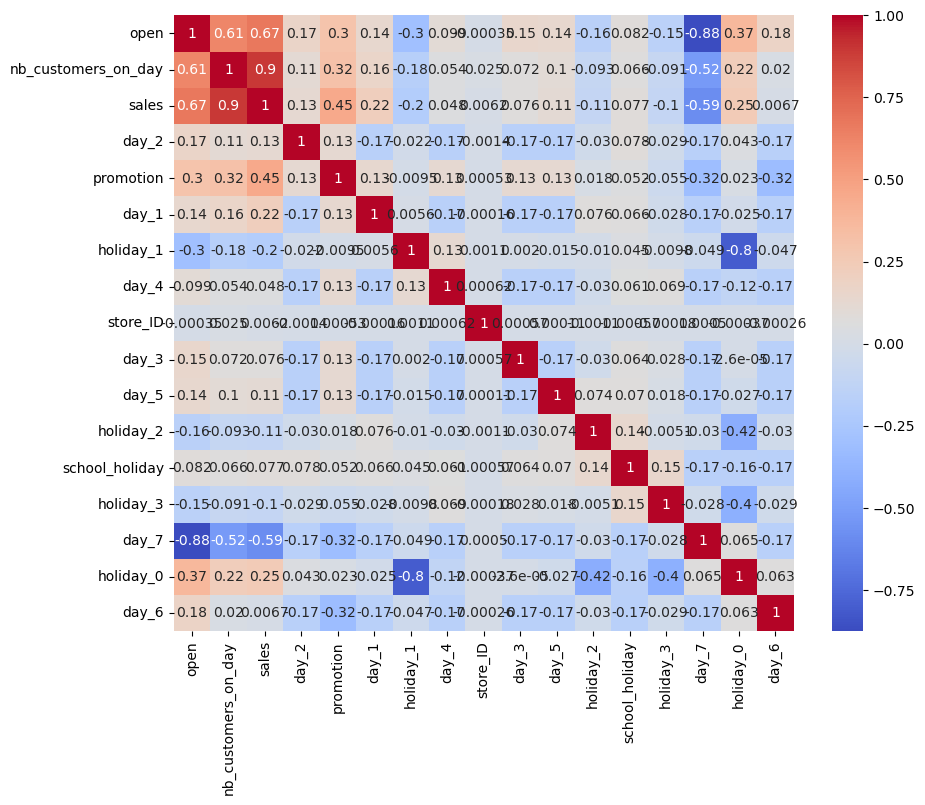

In [55]:
def plot_clustered_correlation_matrix(corrs):
    # clustering correlation matrix
    linkage_matrix = linkage(corrs, method='ward');
    # plot clustered correlation matrix
    leaves = dendrogram(linkage_matrix, labels=corrs.columns, orientation='left')['leaves'];
    plt.close()
    col_order = corrs.columns[leaves]
    # plot clustered correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corrs.loc[col_order, col_order], annot=True, cmap='coolwarm')

# The error is caused because the corr() method only works with numerical data.
# To fix this, we need to select only the numerical columns before calculating the correlation matrix.
# We can achieve this using the select_dtypes method and include only number data types.
corrs = cl_df.select_dtypes(include=['number']).corr()
plot_clustered_correlation_matrix(corrs)

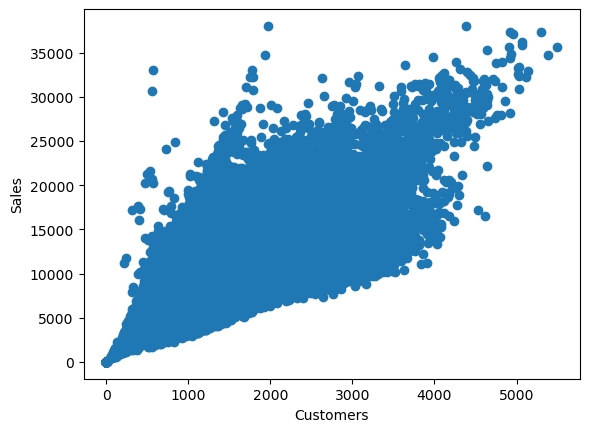

In [38]:
plt.scatter(cl_df['nb_customers_on_day'],cl_df['sales'])
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

From the analysis above we can see that the features that correlate the best to the sales are:
- nb_customers_on_day
- open
- promotion

### Model Building

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = cl_df[
    [
        'nb_customers_on_day',
        'promotion',
        'open',
        'day_1',
        'day_2',
        'day_3',
        'day_4',
        'day_5',
        'day_6',
        'day_7',
        'holiday_0',
        'holiday_1',
        'holiday_2',
        'holiday_3'
        ]
    ]
y = cl_df[['sales']]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [97]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(x_test)

In [ ]:
mae = mean_squared_error(y_test, y_pred)
mae # 2068553.182912256 seems to high but i guess that's okay because of large data

2068553.182912256

In [ ]:
r2 = r2_score(y_test, y_pred)
r2 # 0.8595509425021842

0.8595509425021842